**Modeling objective**
*The modeling objective is to build and test a Naive Bayes model that uses banking data to predict whether a customer will churn. If a customer churns, it means they left the bank and took their business elsewhere. If we can predict customers who are likely to churn, we can take measures to retain them before they do. These measures could be promotions, discounts, or other incentives to boost customer satisfaction and, therefore, retention.*

In [1]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 4.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 4.2 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.1 MB 4.4 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 4.9 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 4.9 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 4.9 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 4.3 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.1 MB 4.3 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 4.4 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.1 MB 4.3 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 4.5 MB/s eta 0:00:01
   -

In [2]:
import sklearn
print(sklearn.__version__)

1.6.1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


our target variable is called Exited. This is a Boolean value that indicates whether or not a customer left the bank (0 = did not leave, 1 = did leave). For each customer, our model will predict whether they should have a 0 or a 1 in the Exited column.

In [19]:
churn_df = pd.read_csv('churn_mod.csv')
churn_df['Lotalty']=churn_df['Tenure']/ churn_df['Age']
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Lotalty
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.047619
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.024390
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.190476
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.025641
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.046512


In [3]:
# Check class balance, how many excited 0 or 1
churn_df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [20]:
# Drop Tenure and Age variables, as they are dependent. Also drop those column which are strings and unrelated for modelling
churn_df = churn_df.drop(['Tenure', 'Age','CustomerId','RowNumber','Surname', 'Geography','Gender'], axis=1)

churn_df.head()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Lotalty
0,619,0.00,1,1,1,101348.88,1,0.047619
1,608,83807.86,1,0,1,112542.58,0,0.024390
2,502,159660.80,3,1,0,113931.57,1,0.190476
3,699,0.00,2,0,0,93826.63,0,0.025641
4,850,125510.82,1,1,1,79084.10,0,0.046512


split the data in train and test

In [21]:
# Define the y (target) variable
y = churn_df['Exited']

# Define the X (predictor) variables
X = churn_df.copy()
X = X.drop('Exited', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, \
                                                    stratify=y, random_state=42)

**Modeling : using the GaussianNB classifier**
*This implementation assumes that all of your variables are continuous and that they have a Gaussian (i.e., normal) distribution. 
Our data does not perfectly adhere to these assumptions, but a Gaussian model may still yield usable results, even with imperfect data.*

In [22]:
# Fit the model with training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Get the predictions on test data
y_preds = gnb.predict(X_test)

In [24]:
# how our model performs using the evaluation metrics
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.796
Precision: 0.000
Recall: 0.000
F1 Score: 0.000


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Hmm… this isn’t very good. Our precision, recall, and F1 scores are all zero. What’s going on? 

In [25]:
# Check unique values in predictions
np.unique(y_preds)

array([0])

This confirms that the model predicted 0 (not churned) for every sample in the test data.

In [26]:
# Get descriptive stats for data
X.describe()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Lotalty
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.137936
std,96.653299,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.089506
min,350.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.064516
50%,652.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.129032
75%,718.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.200000
max,850.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,0.555556


This dataset need some scaling as such as Balance or EstimatedSalary. The maximum value of Loyalty is 0.56, while the maximum for Balance is over 250,000—almost six orders of magnitude greater!

In [39]:
# Import the scaler function
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training data
X_train = scaler.transform(X_train)

# Scale the test data
X_test = scaler.transform(X_test)

In [40]:
# Now Fitting again the model
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train, y_train)

# Get the predictions on test data
scaled_preds = gnb_scaled.predict(X_test)

In [41]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, scaled_preds))
print('Precision:', '%.3f' % precision_score(y_test,scaled_preds))
print('Recall:', '%.3f' % recall_score(y_test, scaled_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, scaled_preds))

Accuracy: 0.819
Precision: 0.924
Recall: 0.120
F1 Score: 0.212


**It works now! The model is far from perfect, but at least it's predicting churned customers now.**

In [42]:
## Let's examine more closely how our model classified the test data. We'll do this with a confusion matrix.
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

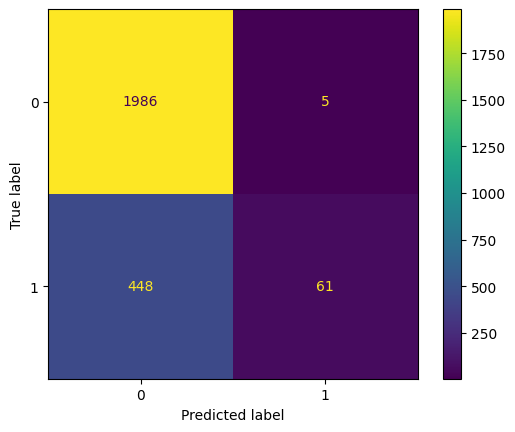

In [43]:
conf_matrix_plot(gnb_scaled, X_test, y_test)

**Conclusion** there are a lot of false negatives—448, to be exact. This is why our recall score is only 0.120. Would we use this model? It depends. For one thing, we'd certainly want to develop other models to see if they perform better. 

*Try a DecisionTreeClassifier*

In [45]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree.fit(X_train, y_train)

# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

In [46]:
# Generate performance metrics
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred))

Accuracy: 0.747
Precision: 0.380
Recall: 0.385
F1 Score: 0.382


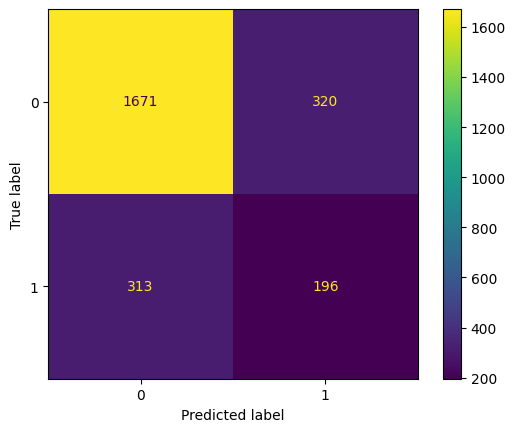

In [47]:
# Generate confusion matrix
conf_matrix_plot(decision_tree, X_test, y_test)

Notice from this confusion matrix that the model correctly predicts many true negatives. Of course, this is to be expected, given that the dataset is imbalanced in favor of negatives. 

In [48]:
# This function displays the splits of the tree
from sklearn.tree import plot_tree

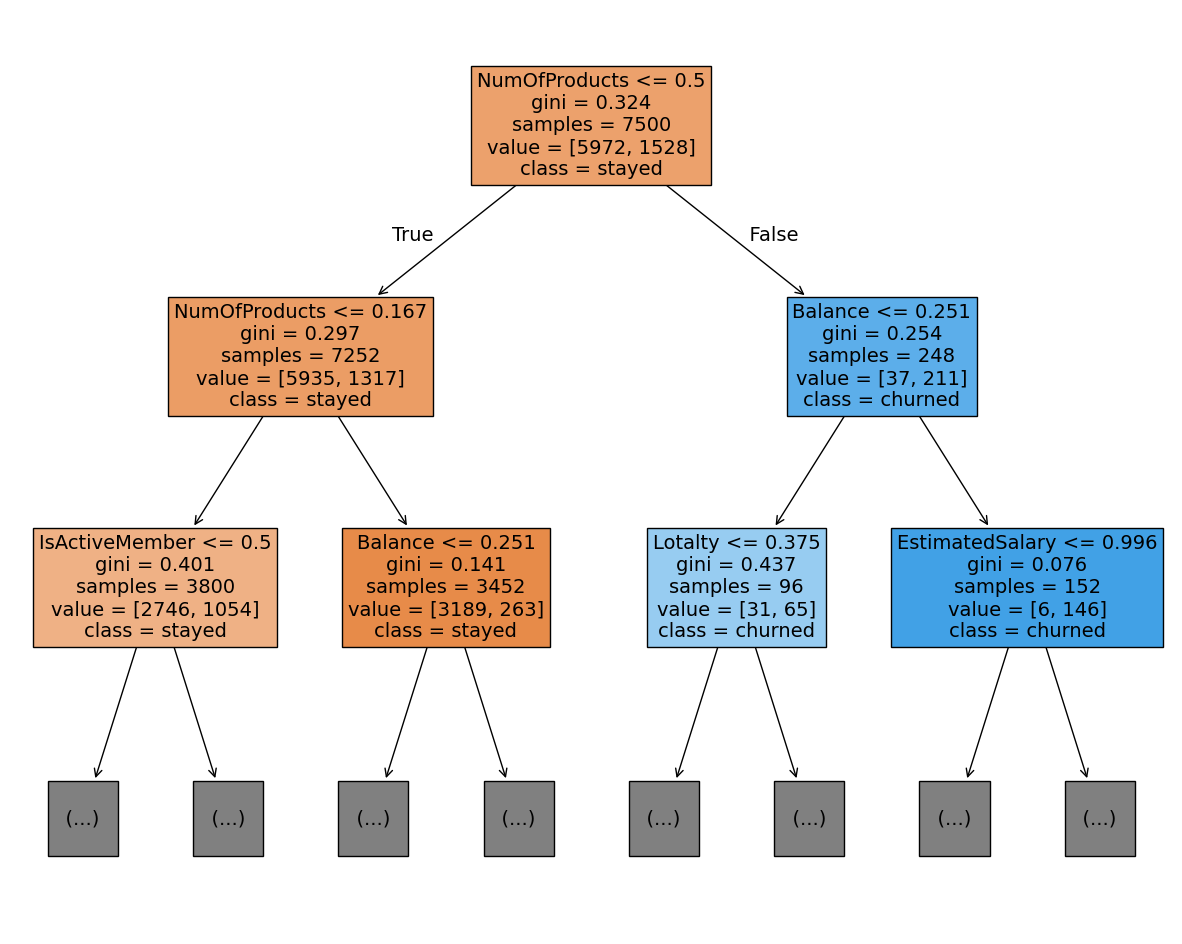

In [49]:
# Plot the tree
plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'churned'}, filled=True);
plt.show()

In [50]:
# Import GridSearchCV This is what we'll use to perform the grid search to tune the model's hyperparameters.
from sklearn.model_selection import GridSearchCV

In [54]:
# Instantiate the classifier
tuned_decision_tree = DecisionTreeClassifier(random_state = 42)

In [69]:
# Assign a dictionary of hyperparameters to search over
tree_para = {'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50],
             'min_samples_leaf': [2, 5, 10, 20, 50]}


In [73]:
# Assign a set of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [74]:
# Instantiate the GridSearch
#%%time
clf = GridSearchCV(tuned_decision_tree, 
                   param_grid=tree_para, 
                   scoring=scoring, 
                   cv=5, 
                   refit="f1")

# Fit the model
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 50]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [75]:
# Examine the best model from GridSearch
clf.best_estimator_

DecisionTreeClassifier(max_depth=30, min_samples_leaf=10, random_state=42)

In [76]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.4117


In [77]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )
  
    return table

In [82]:
# Call the function on our model
result_table = make_results("Tuned Decision Tree", clf)

In [79]:
# Save table as csv. We can save these results and open them in another notebook if we want to add to them. We'll save as a .csv file using to_csv().
result_table.to_csv("Results.csv")

In [80]:
# View the results
result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.411695,0.359949,0.483671,0.7916
